In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.util import random_noise
from ultralytics import YOLO
import re

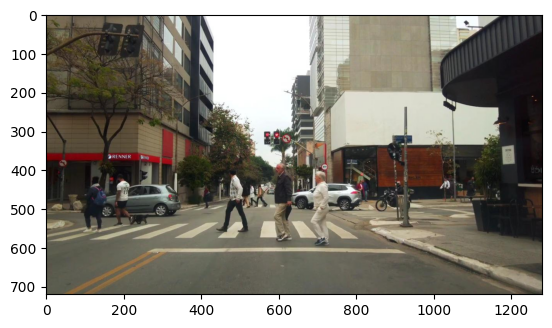

In [2]:
image = plt.imread("C:/Users/Carlos Eduardo/OneDrive - Fundação São Paulo/Área de Trabalho/GitHub/TCC-CDIA/data/frames/images/SP1_mp4-2_jpg.rf.a0443804f286971becd8058d99432a04.jpg")
plt.imshow(image)

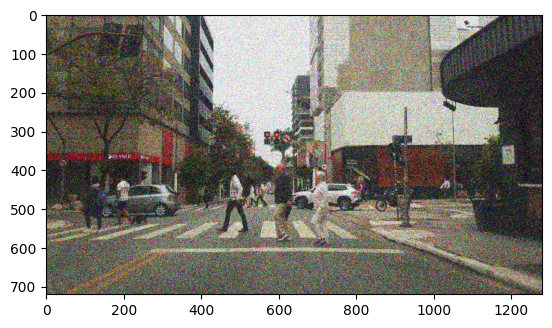

In [73]:
#GAUSSIAN NOISE
image_gaussian_noise = random_noise(image, mode='gaussian', mean=0, var=0.075)
image_gaussian_noise = image_gaussian_noise*255
image_gaussian_noise = image_gaussian_noise.astype('uint8')
plt.imshow(image_gaussian_noise)

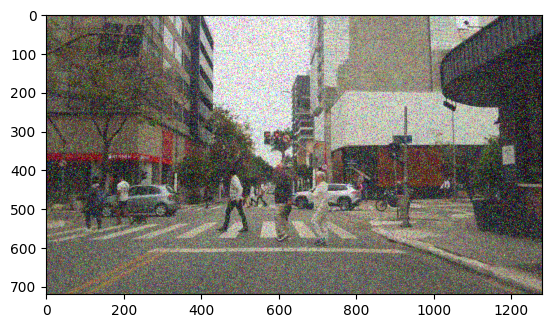

In [92]:
#SALT AND PEPPER NOISE

image_sp_noise = random_noise(image, mode='s&p', amount=0.25)
image_sp_noise = image_sp_noise*255
image_sp_noise = image_sp_noise.astype('uint8')
plt.imshow(image_sp_noise)

In [115]:
##########

In [6]:
# PERFOMANCE DO YOLO NA IMAGEM ADULTERADA

In [2]:
import sys
sys.path.append('C://Users//Carlos Eduardo//OneDrive - Fundação São Paulo//Área de Trabalho//GitHub//TCC-CDIA')
from src.pipeline import PredPipe

In [3]:
model = YOLO('../models/yolo/yolov8m.pt')

In [4]:
image = "../data/frames/images/30_original.jpg"

In [5]:
pred = PredPipe(model, image, 0, 0)
pred.predict_image(add_noise = False)


image 1/1 c:\Users\Carlos Eduardo\OneDrive - Fundao So Paulo\rea de Trabalho\GitHub\TCC-CDIA\notebooks\..\data\frames\images\30_original.jpg: 384x640 1 person, 9 cars, 808.1ms
Speed: 41.9ms preprocess, 808.1ms inference, 74.8ms postprocess per image at shape (1, 3, 384, 640)


(array([[[136, 147, 161],
         [138, 149, 163],
         [147, 158, 172],
         ...,
         [148, 139, 119],
         [124, 115,  95],
         [ 80,  71,  51]],
 
        [[166, 177, 191],
         [156, 167, 181],
         [148, 159, 173],
         ...,
         [127, 118,  98],
         [111, 102,  82],
         [ 82,  73,  53]],
 
        [[188, 199, 213],
         [180, 191, 205],
         [171, 182, 196],
         ...,
         [108,  97,  77],
         [112, 101,  81],
         [105,  94,  74]],
 
        ...,
 
        [[  0, 255,   0],
         [  0, 255,   0],
         [159, 149, 139],
         ...,
         [ 76,  64,  54],
         [  0, 255,   0],
         [  0, 255,   0]],
 
        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],
 
        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
  

In [14]:
###########################################################################################################################

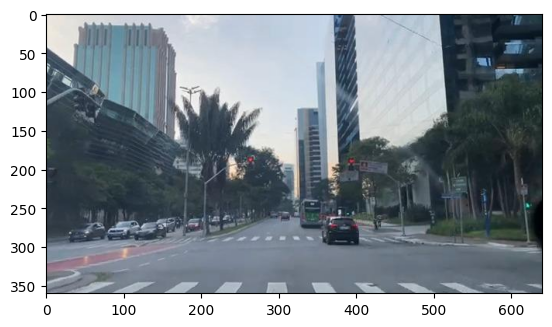

In [81]:
image = mpimg.imread("C:/Users/Carlos Eduardo/OneDrive - Fundação São Paulo/Área de Trabalho/GitHub/TCC-CDIA/data/frames/images/50_original.jpg")
plt.imshow(image)

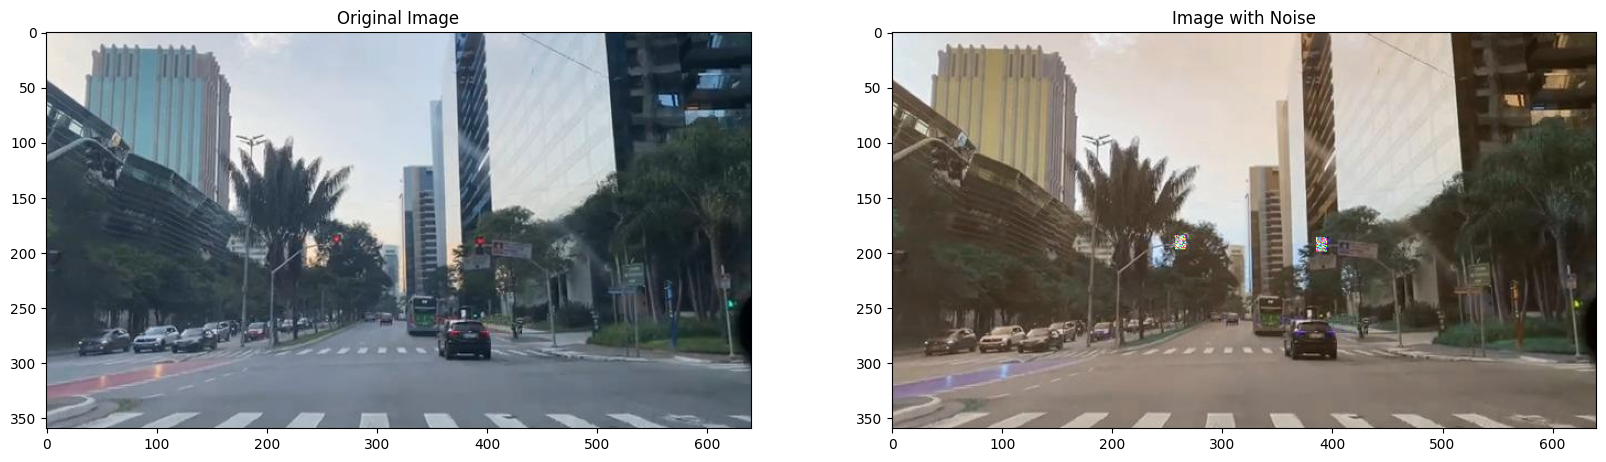

In [91]:
def add_noise_traffic_ligths(image_path):
    #image
    image = mpimg.imread(image_path)
    # create a copy from original image (region that will be modified
    image_with_noise = np.copy(image)
    image_with_noise = cv2.cvtColor(image_with_noise, cv2.COLOR_BGR2RGB)
    # coords that will suffer noise
    number_tf = int(input("HOW MANY TRAFFIC LIGHTS DO YOU WANT TO ADD NOISE?"))

    for tf in range(number_tf):
        coord_x = int(input(f"COORD X - TRAFFIC LIGTH {tf+1}: "))
        coord_y = int(input(f"COORD Y - TRAFFIC LIGTH {tf+1}: "))
        width_noise = int(input(f"WIDTH: - TRAFFIC LIGTH {tf+1}: "))
        height_noise = int(input(f"HEIGHT: - TRAFFIC LIGTH {tf+1}: "))

        x = coord_x  
        y = coord_y
        width = width_noise  # width pixels
        height = height_noise  # height pixels

        # applying noise in image above (exemplo: ruído gaussiano)
        mean = 0
        std = 30
        noise = np.random.normal(mean, std, (image[y:y+height, x:x+width]).shape).astype(np.uint8)

        region_with_noise = cv2.add((image[y:y+height, x:x+width]), noise)

        # replacing the region in the original image with the region_with_noise
        image_with_noise[y:y+height, x:x+width] = region_with_noise

    # Plot both
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(image_with_noise)
    plt.title('Image with Noise')
    plt.show()

    path_noise_image = "../data/noisy/noise_image_"
    noise_image = re.findall(r"\d+", image_path)
    final_path = path_noise_image + noise_image[0] + ".jpg"
    cv2.imwrite(final_path, image_with_noise)

add_noise_traffic_ligths("../data/frames/images/50_original.jpg")
